# ARMA process manipulation

In this example we will expose some of the services exposed by an $ARMA(p,q)$ object, namely:

-  its AR and MA coefficients thanks to the methods *getARCoefficients,
   getMACoefficients*,

-  its white noise thanks to the method *getWhiteNoise*, that contains
   the time grid of the process,

-  its current state, that is its last $p$ values and the last
   $q$ values of its white noise, thanks to the method *getState*,

-  a realization thanks to the method *getRealization* or a sample of realizations thanks to the method *getSample*,

-  a possible future of the model, which is a possible prolongation of
   the current state on the next $n_{prol}$ instants, thanks to
   the method *getFuture*.

-  $n$ possible futures of the model, which correspond to
   $n$ possible prolongations of the current state on the next
   $n_{prol}$ instants, thanks to the method
   *getFuture* ($n_{prol}$, $n$).

In [2]:
from __future__ import print_function
import openturns as ot
import math as m

In [3]:
# Create an ARMA process

# Create the mesh
tMin = 0.
time_step = 0.1
n = 100
time_grid = ot.RegularGrid(tMin, time_step, n)

# Create the distribution of dimension 1 or 3
# Care : the mean must be NULL
myDist_1 = ot.Triangular(-1., 0.0, 1.)

# Create  a white noise of dimension 1
myWN_1d = ot.WhiteNoise(myDist_1, time_grid)

# Create the ARMA model : ARMA(4,2) in dimension 1
myARCoef = ot.ARMACoefficients([0.4, 0.3, 0.2, 0.1])
myMACoef = ot.ARMACoefficients([0.4, 0.3])
arma = ot.ARMA(myARCoef, myMACoef, myWN_1d)

In [4]:
# Check the linear recurrence
arma

class= ARMA timeGrid=class=RegularGrid name=Unnamed start=0 step=0.1 n=100 coefficients AR=class=ARMACoefficients, shift=0, value=class=SquareMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0.4], shift=1, value=class=SquareMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0.3], shift=2, value=class=SquareMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0.2], shift=3, value=class=SquareMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0.1] coefficients MA=class=ARMACoefficients, shift=0, value=class=SquareMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0.4], shift=1, value=class=SquareMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[0.3] noiseDistribution= class=Triangular name=Triangular dimension=1 a=-1 m=0 b=1 state= class= ARMAState x= class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=4 dimension=1 data=[[0.296885],[-0.346275],[0.776317],[-0.0715725]] epsilon= class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2 dimension=1 data=[[0.787089],[-0.0171556]]

In [5]:
# Get the coefficients of the recurrence
print('AR coeff = ', arma.getARCoefficients())
print('MA coeff = ', arma.getMACoefficients())

AR coeff =  shift = 0
[[ 0.4 ]]
shift = 1
[[ 0.3 ]]
shift = 2
[[ 0.2 ]]
shift = 3
[[ 0.1 ]]

MA coeff =  shift = 0
[[ 0.4 ]]
shift = 1
[[ 0.3 ]]



In [6]:
# Get the white noise
myWhiteNoise = arma.getWhiteNoise()
myWhiteNoise

class=WhiteNoise distribution=class=Triangular name=Triangular dimension=1 a=-1 m=0 b=1

In [15]:
# Generate one time series
ts = arma.getRealization()
ts.setName('ARMA realization')

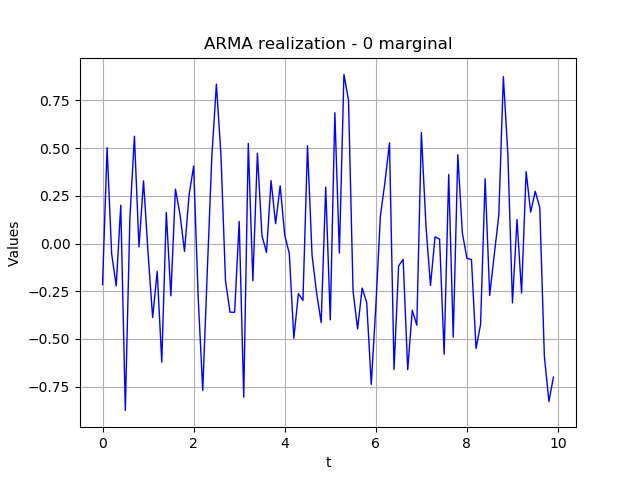

In [8]:
# Draw the time series : marginal index 0
ts.drawMarginal(0)

In [9]:
# Generate a k time series
k = 5
myProcessSample = arma.getSample(k)

# Then get the current state of the ARMA
armaState = arma.getState()
# From the armaState, get the last values
myLastValues = armaState.getX()
# From the ARMAState, get the last noise values
myLastEpsilonValues = armaState.getEpsilon()

In [10]:
# Get the number of iterations before getting a stationary state
arma.getNThermalization()

75

In [11]:
# This may be important to evaluate it with another precision epsilon
epsilon = 1e-8
newThermalValue = arma.computeNThermalization(epsilon)
arma.setNThermalization(newThermalValue)

In [14]:
# Make a prediction from the curent state of the ARMA
# on the next Nit instants
Nit = 100
# at first, specify a current state armaState
arma = ot.ARMA(myARCoef, myMACoef, myWhiteNoise, armaState)

# then, generate a possible future
future = arma.getFuture(Nit)

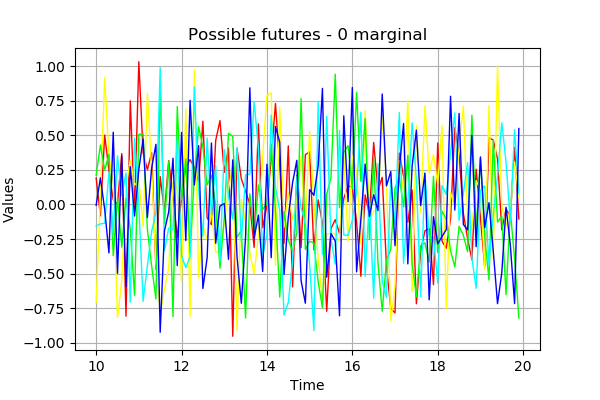

In [13]:
# Generate N possible futures on the Nit next points
N = 5
possibleFuture_N = arma.getFuture(Nit, N)
possibleFuture_N.setName('Possible futures')

# Draw the future : marginal index 0
possibleFuture_N.drawMarginal(0)